# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('DDos.csv')
df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


### Removing the spaces before the column names

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [6]:
#Unique values in the Label target column

df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

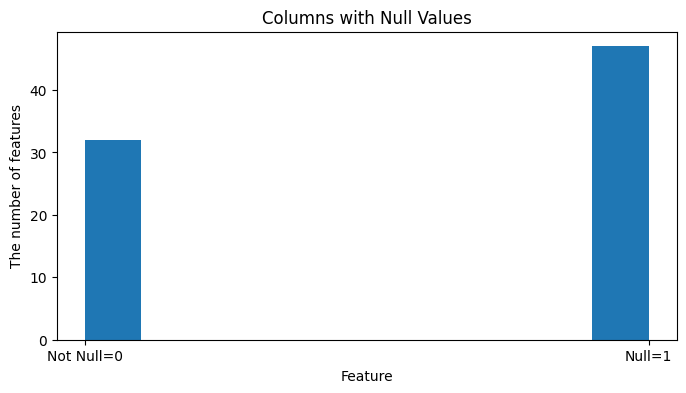

In [7]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 8,4))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

# Show the plot
plt.show()


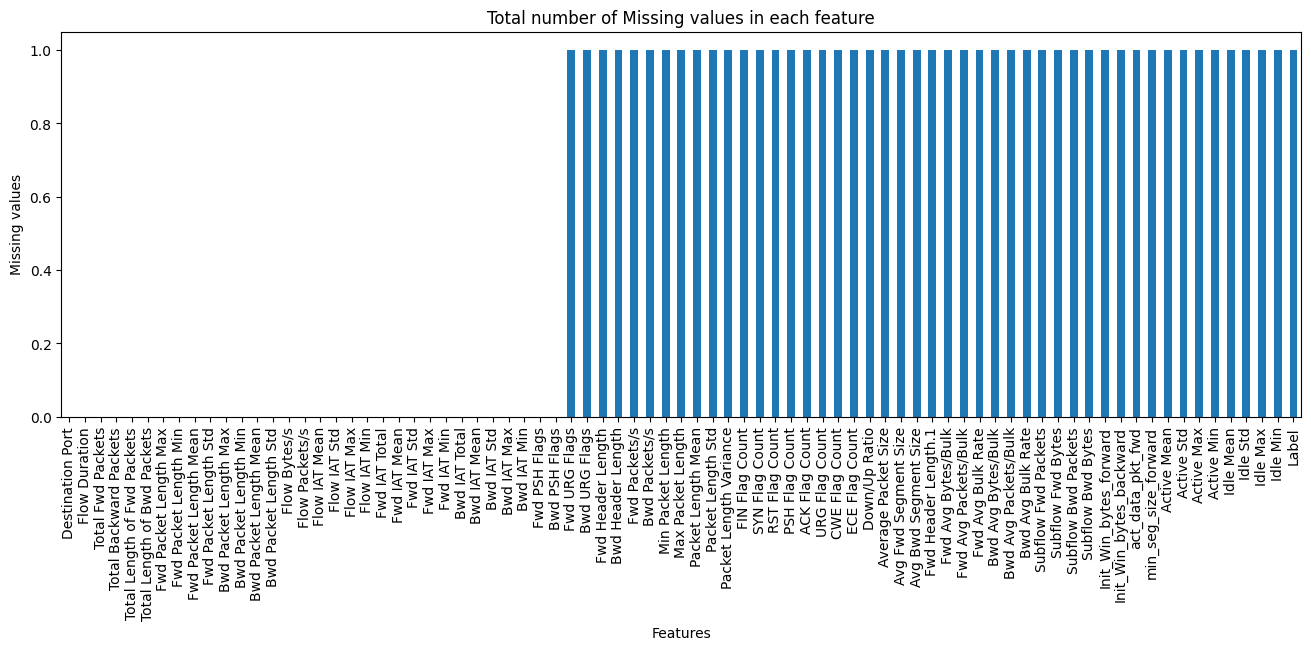

In [8]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)


## Removing the null values

In [9]:
data_f=df.dropna()

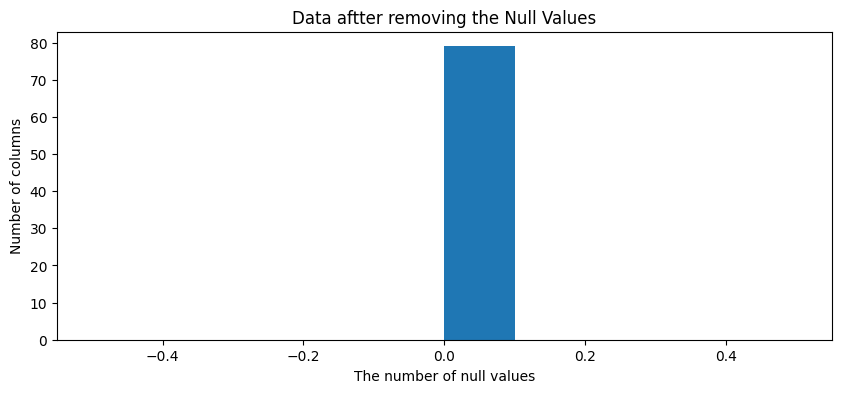

In [10]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Set the title and axis labels
plt.title('Data aftter removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')

# Show the plot
plt.show()


In [11]:
pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
null_values=data_f.isnull().sum()  # Check for NaN values

In [12]:
# To know the data types of the columns

(data_f.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [13]:
#import category_encoders as ce

#encoder = ce.BinaryEncoder(cols=['Label'], return_df=True)
#Ecoded_label = encoder.fit_transform(df)
#Ecoded_label

## Converting the labels in the DataFrame to numerical values

In [14]:
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

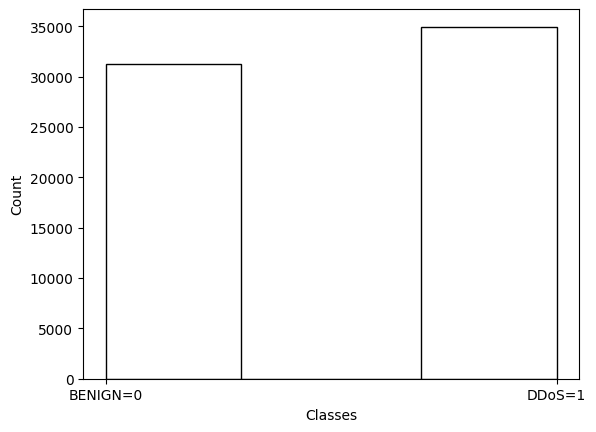

In [15]:
# Print the DataFrame
colors = ['white']  # Specify different colors for each bin

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black', color = colors)  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Distribution of Benign and DDoS')

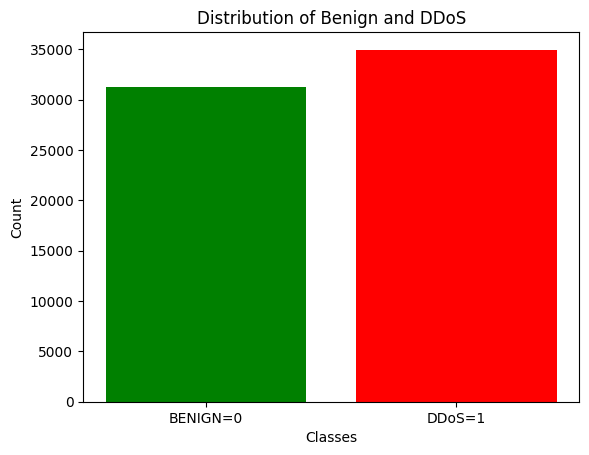

In [16]:
gp=data_f.groupby('Label')['Label'].count()
plt.bar(list(gp.index),list(gp.values),color=['g','r'])
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Distribution of Benign and DDoS")

## Data exploring

In [17]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,66237.000000,...,66236.000000,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04
mean,6454.605553,1.388736e+07,5.180262,5.119223,695.622567,6.716837e+03,351.442064,23.465797,110.715335,135.438642,...,3.447793,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06
std,16710.894455,2.815843e+07,16.873659,23.797124,3230.046907,4.222698e+04,1435.510506,136.608403,400.376692,613.421563,...,13.108006,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.995600e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,9.949050e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.639831e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,4.000000,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


### Create a histogram plot for each feature

In [18]:
'''plt.figure(5)
for col in data_f.columns:
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

    ''' 

'plt.figure(5)\nfor col in data_f.columns:\n    plt.hist(data_f[col])\n    plt.title(col)\n    plt.show()\n\n    '

## Data splitting into train and test

In [19]:
# Convert into numpy array

#X1=np.array(data_f).astype(np.float64)
#y1=np.array(data_f['Label'])



### Spliting data into features and target variable

In [20]:
X = data_f.drop('Label', axis=1)
y = data_f['Label']

### Split the data into training and testing sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (46365, 78)
The test dataset size =  (19871, 78)


# Starting Training Models

## Random Forest

In [23]:

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

### Try Me...

In [24]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.9995
F1 Score: 0.9995
Precision: 1.0000
Recall: 0.9990


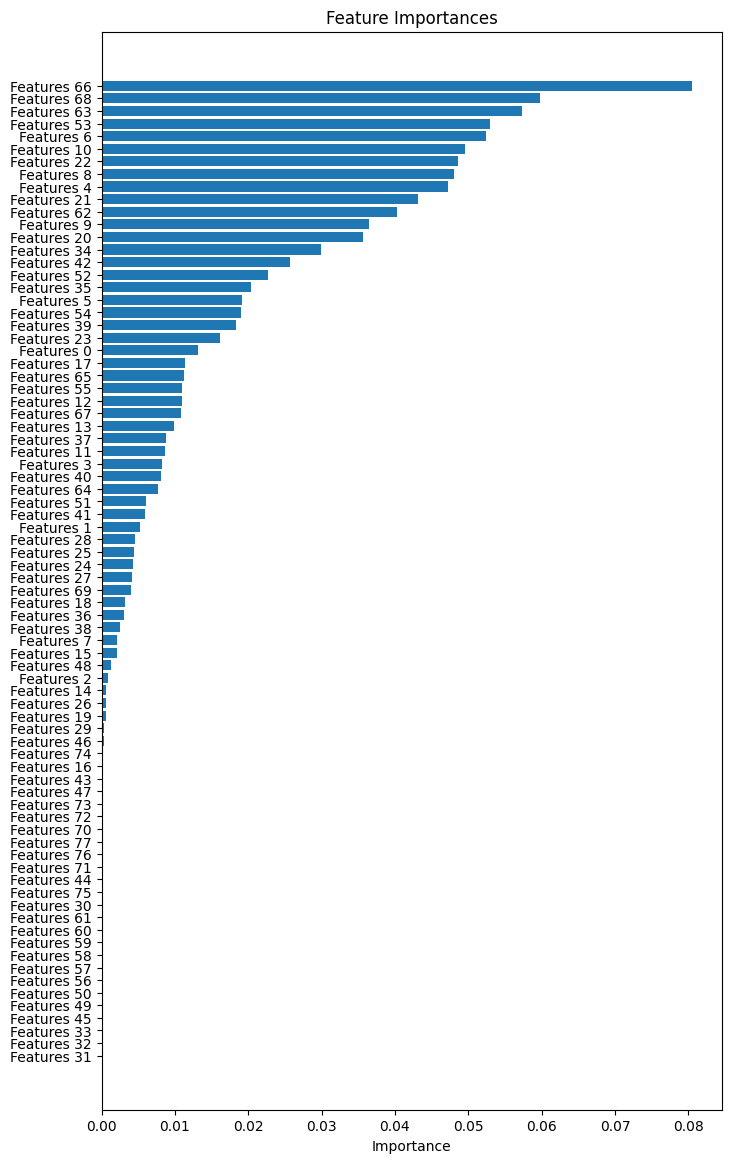

In [25]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]  # Replace with your column names

# Plotting feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

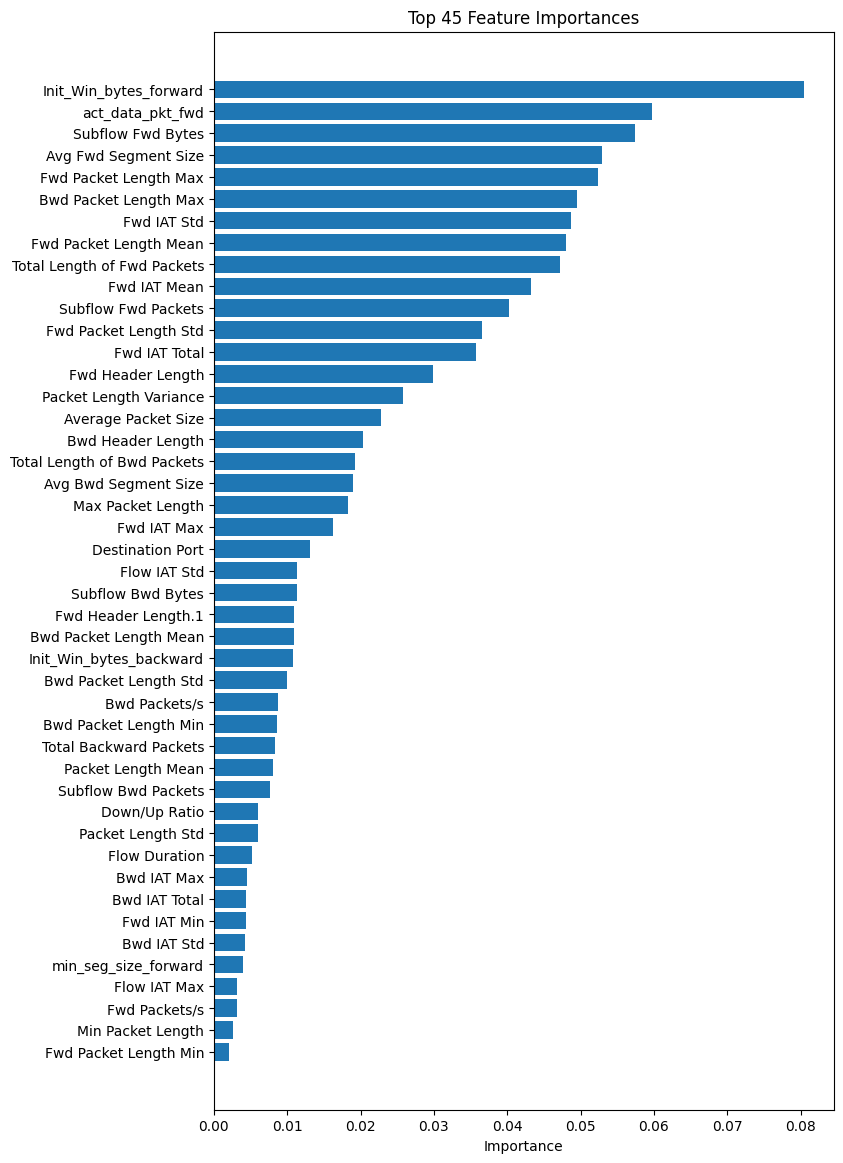

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming rf_model is your trained RandomForest model and X_train, X_test are your datasets

# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Ensure that the number of features to select does not exceed the number of columns in the DataFrame
num_features_to_select = min(45, X_train.shape[1])

# Getting the indices of features sorted by importance (descending order)
indices = np.argsort(importances)[::-1]

# Selecting the top features
top_indices = indices[:num_features_to_select]

# Getting the column names for the top features
top_feature_names = X_train.columns[top_indices]

# Updating X_train and X_test to keep only the top features
X_train_top = X_train[top_feature_names]
X_test_top = X_test[top_feature_names]

# Keeping top 45 features for training and testing purpose. removing rest of the less important feature
X_train = X_train_top
X_test = X_test_top

# Plotting feature importances for the top features
plt.figure(figsize=(8, 14))
plt.barh(range(num_features_to_select), importances[top_indices], align="center")
plt.yticks(range(num_features_to_select), top_feature_names)
plt.xlabel("Importance")
plt.title(f"Top {num_features_to_select} Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [27]:
X_train.shape

(46365, 45)

In [28]:
X_test.shape

(19871, 45)

## Evaluating Random Forest after dropping less important features


In [29]:

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [30]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.9994
F1 Score: 0.9994
Precision: 1.0000
Recall: 0.9989


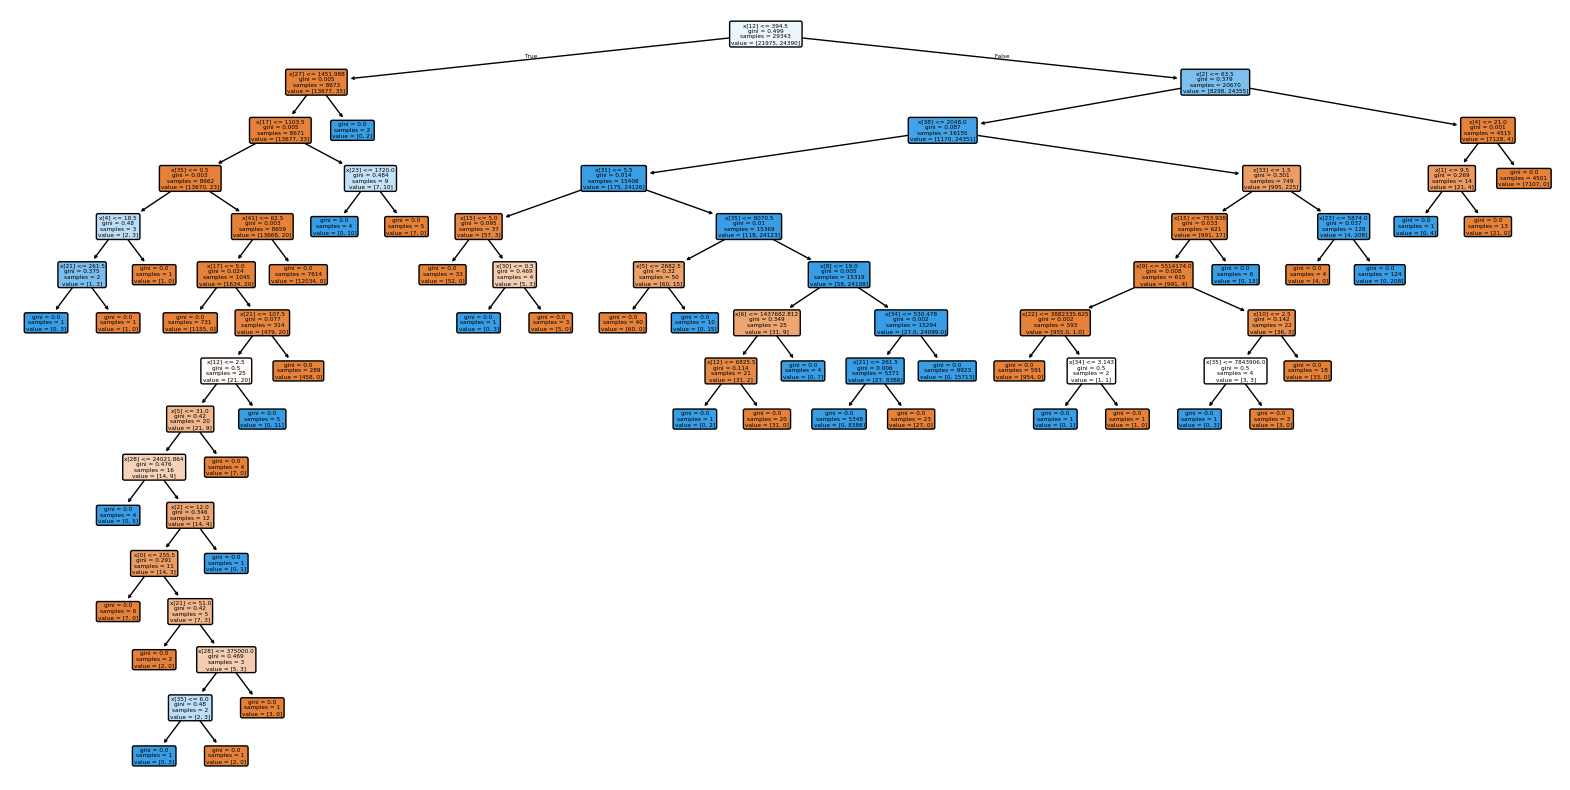

In [31]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

### Model Evaluation 

In [32]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [33]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.9994
F1 Score: 0.9994
Precision: 1.0000
Recall: 0.9989


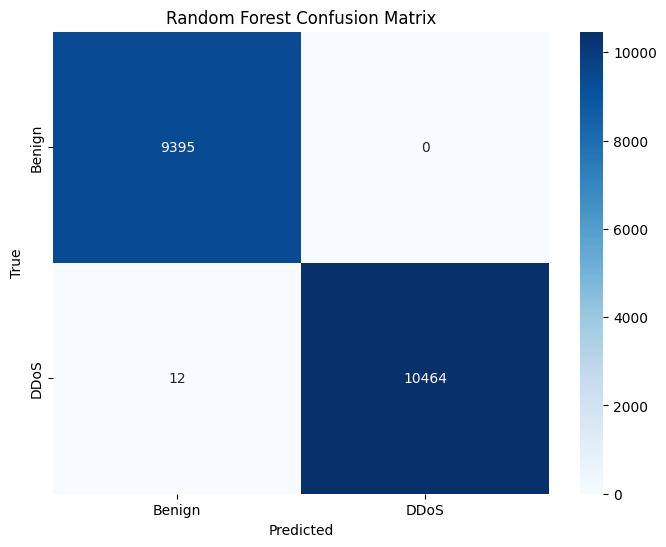

In [34]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

### Logistic Regression

In [35]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

### Evaluate Logistic Regression

In [36]:

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [37]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9339
F1 Score: 0.9404
Precision: 0.8970
Recall: 0.9882


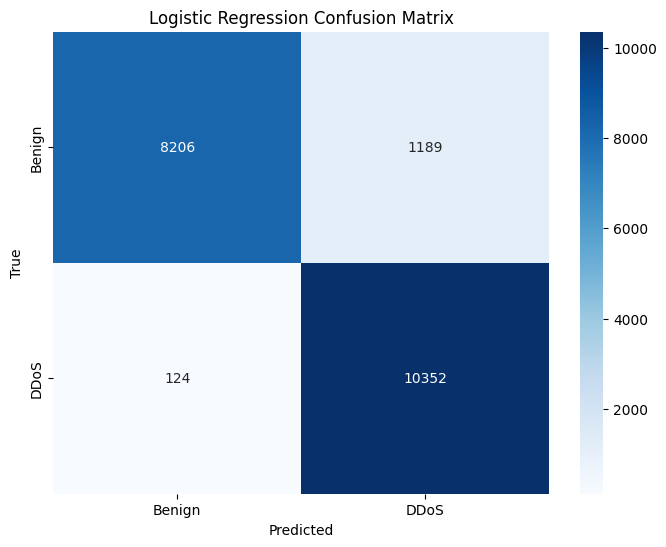

In [38]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')


### Neural Network

In [39]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

### Evaluate Neural Network

In [40]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9855
F1 Score: 0.9863
Precision: 0.9824
Recall: 0.9903


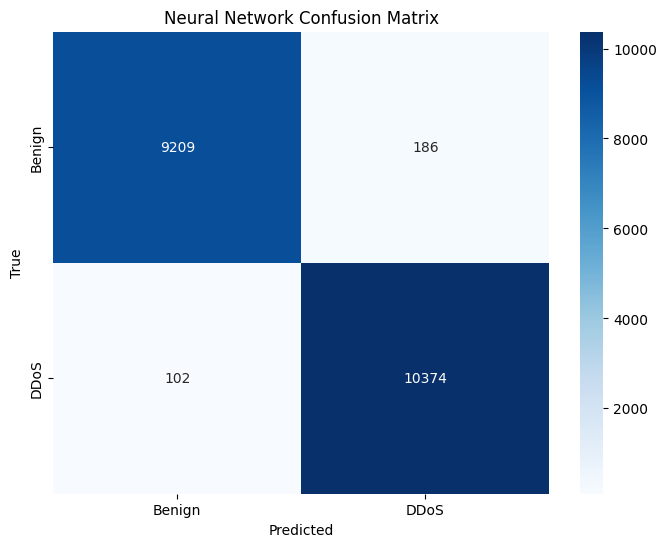

In [41]:
# Confusion Matrix for Neural Network
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')

## Model Comparison

In [42]:
# Random Forest
rf_proba = rf_model.predict_proba(X_test)

# Logistic Regression
lr_proba = lr_model.predict_proba(X_test)



# Neural Network
nn_proba = nn_model.predict_proba(X_test)


In [43]:
# Combine predictions for ROC curve



# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)



# Calculate ROC curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)


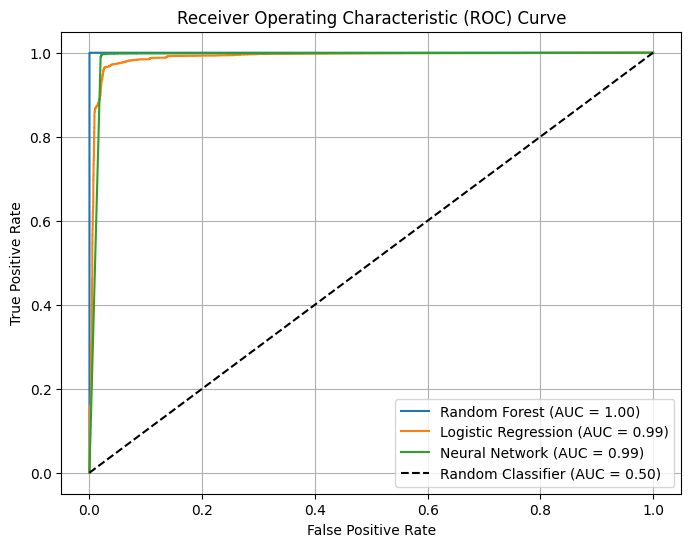

In [44]:
# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')

# Plot ROC curve for random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Explainable AI

## Data Preprocessing
### First, let's check for missing values and encode categorical variables. 


In [45]:
# Load the dataset
data = pd.read_csv('DDos.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


The missing values have been successfully handled. Next, let's proceed with encoding the categorical variable and scaling the numerical features.
### Encoding Categorical Variable
The Label column needs to be encoded into numerical values.
### Scaling Numerical Features
Standardize the numerical features to ensure they contribute equally to the model.
Let's perform these steps. 


In [46]:
# Dropping rows with missing values as there is only one row affected
data_cleaned = data.dropna()

# Confirm that there are no more missing values
missing_values_cleaned = data_cleaned.isnull().sum()
missing_values_cleaned[missing_values_cleaned > 0]

Series([], dtype: int64)

In [47]:
data_cleaned

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66231,80,78317142,8,5,56,11607,20,0,7.000000,5.656854,...,20.0,15996.0,0.0,15996.0,15996.0,78200000.0,0.0,78200000.0,78200000.0,DDoS
66232,80,48778,3,7,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
66233,80,78359838,8,6,56,11601,20,0,7.000000,5.656854,...,20.0,30018.0,0.0,30018.0,30018.0,78300000.0,0.0,78300000.0,78300000.0,DDoS
66234,80,50518,3,6,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS


### It appears that there may be an issue with the column naming. Let's list the columns to ensure we are correctly referencing the Label column. 

In [48]:
# Remove the spaces before the column names
data_cleaned.columns = data_cleaned.columns.str.strip()

In [49]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding the Label column
label_encoder = LabelEncoder()
data_cleaned['Label'] = label_encoder.fit_transform(data_cleaned['Label'])

# Separating features and target variable
X = data_cleaned.drop('Label', axis=1)
y = data_cleaned['Label']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
pd.DataFrame(X_scaled, columns=X.columns).head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,2.896934,-0.493195,-0.188477,-0.215119,-0.211648,-0.159063,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.186742,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359
1,2.908244,-0.493191,-0.247741,-0.173098,-0.213506,-0.158921,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.263032,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359
2,2.908303,-0.493193,-0.247741,-0.173098,-0.213506,-0.158921,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.263032,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359
3,2.380563,-0.493194,-0.247741,-0.173098,-0.213506,-0.158921,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.263032,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359
4,2.896814,-0.493195,-0.188477,-0.215119,-0.211648,-0.159063,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.186742,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359


### The Label column has leading and trailing spaces. Let's remove these spaces from all column names and then proceed with the encoding and scaling process again. 

In [50]:
# List all column names to check the correct reference for the label column
data_cleaned.columns


Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [51]:
# Remove leading and trailing spaces from column names
data_cleaned.columns = data_cleaned.columns.str.strip()

# Encoding the Label column
data_cleaned['Label'] = label_encoder.fit_transform(data_cleaned['Label'])

# Separating features and target variable
X = data_cleaned.drop('Label', axis=1)
y = data_cleaned['Label']

# Standardizing the features
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
pd.DataFrame(X_scaled, columns=X.columns).head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,2.896934,-0.493195,-0.188477,-0.215119,-0.211648,-0.159063,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.186742,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359
1,2.908244,-0.493191,-0.247741,-0.173098,-0.213506,-0.158921,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.263032,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359
2,2.908303,-0.493193,-0.247741,-0.173098,-0.213506,-0.158921,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.263032,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359
3,2.380563,-0.493194,-0.247741,-0.173098,-0.213506,-0.158921,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.263032,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359
4,2.896814,-0.493195,-0.188477,-0.215119,-0.211648,-0.159063,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.186742,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359


### The features have been successfully standardized. Now, let's proceed with splitting the dataset into training and testing sets, and then train a baseline model.
## Splitting the Dataset
### We'll use an 80-20 split for training and testing.
## Training a Baseline Model
### We'll start with a simple model, such as Logistic Regression, to establish a baseline.
## Evaluating Model Performance
### We'll evaluate the model using accuracy, precision, recall, and F1-score metrics.
## Let's perform these steps. 


In [52]:
# Redefine the StandardScaler
scaler = StandardScaler()

# Standardizing the features
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
pd.DataFrame(X_scaled, columns=X.columns).head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,2.896934,-0.493195,-0.188477,-0.215119,-0.211648,-0.159063,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.186742,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359
1,2.908244,-0.493191,-0.247741,-0.173098,-0.213506,-0.158921,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.263032,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359
2,2.908303,-0.493193,-0.247741,-0.173098,-0.213506,-0.158921,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.263032,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359
3,2.380563,-0.493194,-0.247741,-0.173098,-0.213506,-0.158921,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.263032,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359
4,2.896814,-0.493195,-0.188477,-0.215119,-0.211648,-0.159063,-0.240644,-0.127856,-0.261546,-0.220795,...,-0.186742,-0.433782,-0.186809,-0.066251,-0.189628,-0.179068,-0.451843,-0.264474,-0.457015,-0.383359


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

#accuracy, precision, recall, f1


Accuracy: 0.9979
F1 Score: 0.9980
Precision: 0.9973
Recall: 0.9987


### The baseline Logistic Regression model achieved these performance metrics. 
### These are very high performance metrics, indicating that the model is performing well. However, we can further improve the model and make it more interpretable by introducing explainable AI techniques and feature importance analysis.
## Explainable AI Techniques
### We will use SHAP (SHapley Additive exPlanations) to interpret the model and understand the contribution of each feature to the predictions.
## Feature Importance
### We'll identify the most important features contributing to the model's performance.
## Let's proceed with these steps. 


In [54]:
!pip install shap

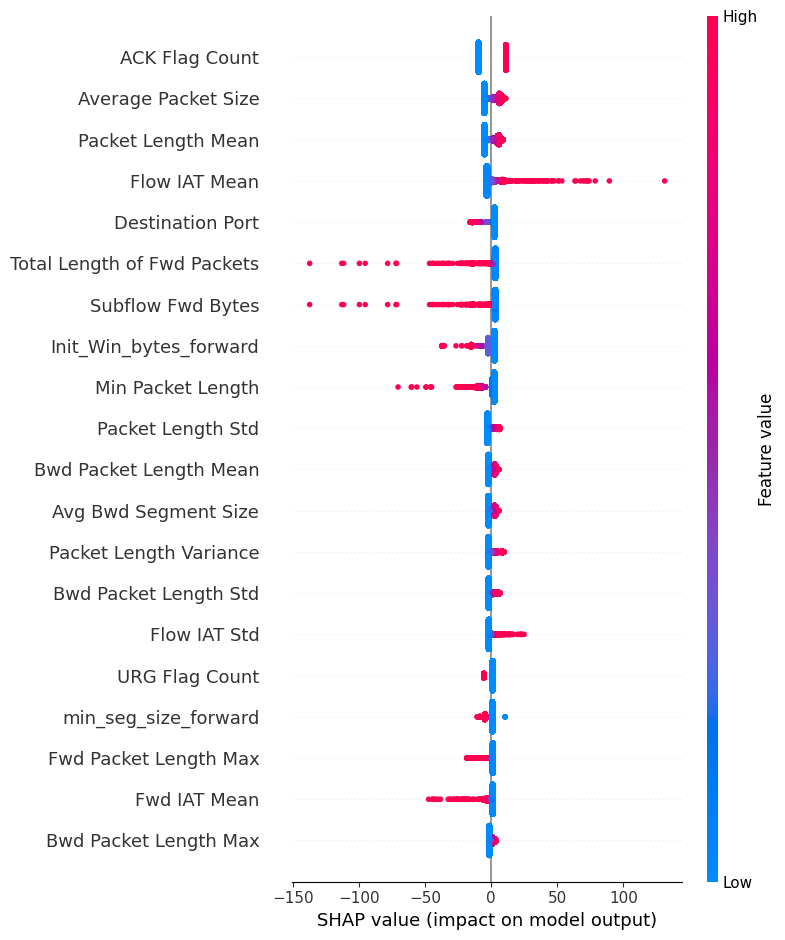

In [55]:
import shap

# Initialize the SHAP explainer
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [56]:
# Correcting the SHAP initialization for compatibility with numpy
# explainer = shap.Explainer(model, X_train, feature_perturbation="interventional")
# shap_values = explainer(X_test)

# Summary plot of SHAP values
# shap.summary_plot(shap_values, X_test, feature_names=X.columns)


# Hybrid Model

In [57]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Define base models
base_models = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Define stacking model with Logistic Regression as the meta-learner
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(random_state=42))

# Define gradient boosting model
boosting_model = GradientBoostingClassifier(random_state=42)

# Define ensemble voting model
voting_model = VotingClassifier(estimators=base_models, voting='hard')

# Train and evaluate each model
models = {
    'Stacking': stacking_model,
    'Boosting': boosting_model,
    'Voting': voting_model
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = report

# Convert results to a DataFrame
results_df = pd.DataFrame(results).transpose()

# Display the results
results_df


,0,1,accuracy,macro avg,weighted avg
Stacking,"{'precision': 0.9991971740526654, 'recall': 1....","{'precision': 1.0, 'recall': 0.999288256227758...",0.999623,"{'precision': 0.9995985870263326, 'recall': 0....","{'precision': 0.9996228875399861, 'recall': 0...."
Boosting,"{'precision': 0.9991971740526654, 'recall': 1....","{'precision': 1.0, 'recall': 0.999288256227758...",0.999623,"{'precision': 0.9995985870263326, 'recall': 0....","{'precision': 0.9996228875399861, 'recall': 0...."
Voting,"{'precision': 0.9991971740526654, 'recall': 1....","{'precision': 1.0, 'recall': 0.999288256227758...",0.999623,"{'precision': 0.9995985870263326, 'recall': 0....","{'precision': 0.9996228875399861, 'recall': 0...."


In [58]:
# Using a smaller subset of the dataset for demonstration purposes
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

# Train and evaluate each model on the smaller subset
results_small = {}

for model_name, model in models.items():
    model.fit(X_train_small, y_train_small)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results_small[model_name] = report

# Display the results
results_df_small = pd.DataFrame(results_small).transpose()

#import ace_tools as tools; tools.display_dataframe_to_user(name="Hybrid Models Comparison (Small Subset)", dataframe=results_df_small)
#results_df_small


# Print the results dataframe to display it
print(results_df_small)

                                                          0  \
Stacking  {'precision': 0.998075380914194, 'recall': 1.0...   
Boosting  {'precision': 0.9980750721847931, 'recall': 0....   
Voting    {'precision': 0.9980750721847931, 'recall': 0....   

                                                          1  accuracy  \
Stacking  {'precision': 1.0, 'recall': 0.998291814946619...  0.999094   
Boosting  {'precision': 0.9998574280011405, 'recall': 0....  0.999019   
Voting    {'precision': 0.9998574280011405, 'recall': 0....  0.999019   

                                                  macro avg  \
Stacking  {'precision': 0.999037690457097, 'recall': 0.9...   
Boosting  {'precision': 0.9989662500929668, 'recall': 0....   
Voting    {'precision': 0.9989662500929668, 'recall': 0....   

                                               weighted avg  
Stacking  {'precision': 0.99909594621294, 'recall': 0.99...  
Boosting  {'precision': 0.9990201997217678, 'recall': 0....  
Voting    {'pre